In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('census_income_dataset.csv', na_values='?')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gains,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.drop(
    columns=['fnlwgt', 'education', 'relationship', 'race', 'sex'], 
    inplace=True
)
df.head()

,age,workclass,education-num,marital-status,occupation,capital-gains,capital-loss,hours-per-week,native-country,target
0,39,State-gov,13,Never-married,Adm-clerical,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 10)

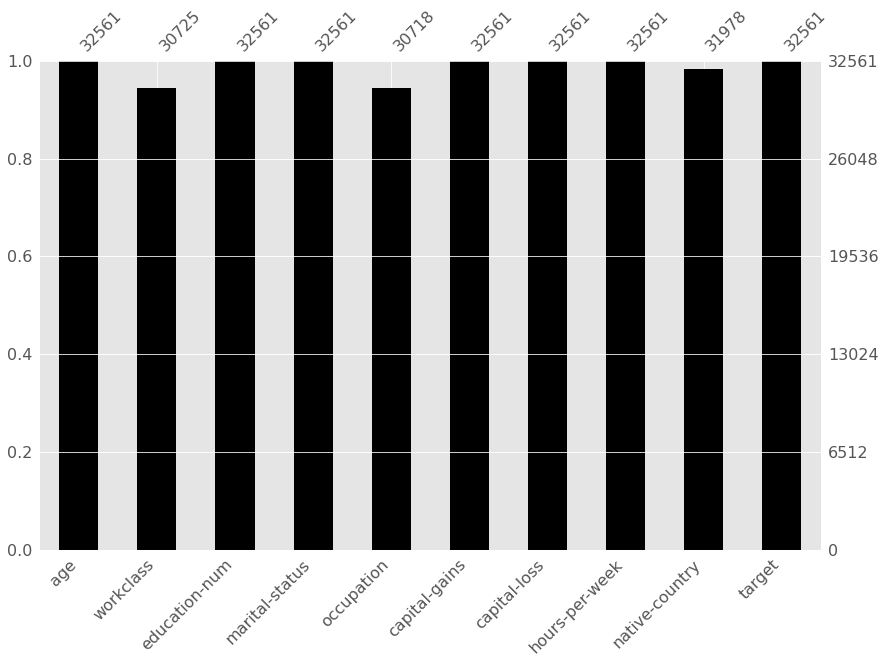

In [5]:
msno.bar(df, figsize=(14, 9), color='k')

In [6]:
df.isna().sum() * 100/df.shape[0]

age               0.000000
workclass         5.638647
education-num     0.000000
marital-status    0.000000
occupation        5.660146
capital-gains     0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    1.790486
target            0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education-num   32561 non-null  int64 
 3   marital-status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   capital-gains   32561 non-null  int64 
 6   capital-loss    32561 non-null  int64 
 7   hours-per-week  32561 non-null  int64 
 8   native-country  31978 non-null  object
 9   target          32561 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


In [8]:
df.dtypes.value_counts()

int64     5
object    5
dtype: int64

In [9]:
data, target = df.drop(columns=['target']), df.target

In [10]:
cat_features = data.select_dtypes(include='object').columns.tolist()
num_features = data.select_dtypes(include='number').columns.tolist()

print(f'Categorical features: {cat_features}')
print(f'Numerical features: {num_features}')

Categorical features: ['workclass', 'marital-status', 'occupation', 'native-country']
Numerical features: ['age', 'education-num', 'capital-gains', 'capital-loss', 'hours-per-week']


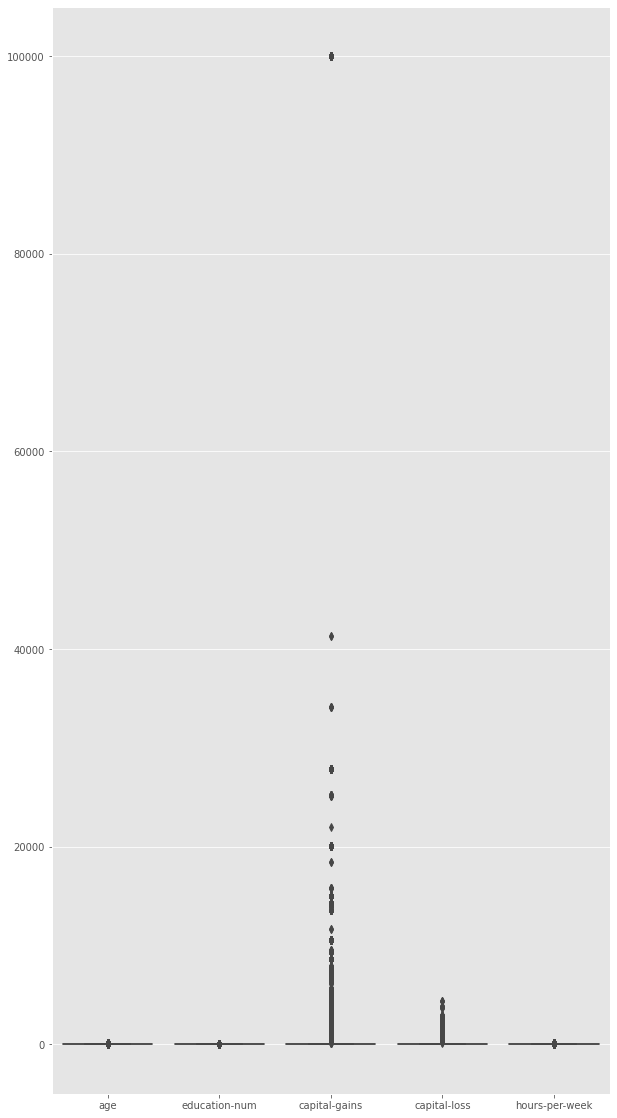

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 20)
sns.boxplot(data=df, orient='v')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd1b76a90>,
      dtype=object)

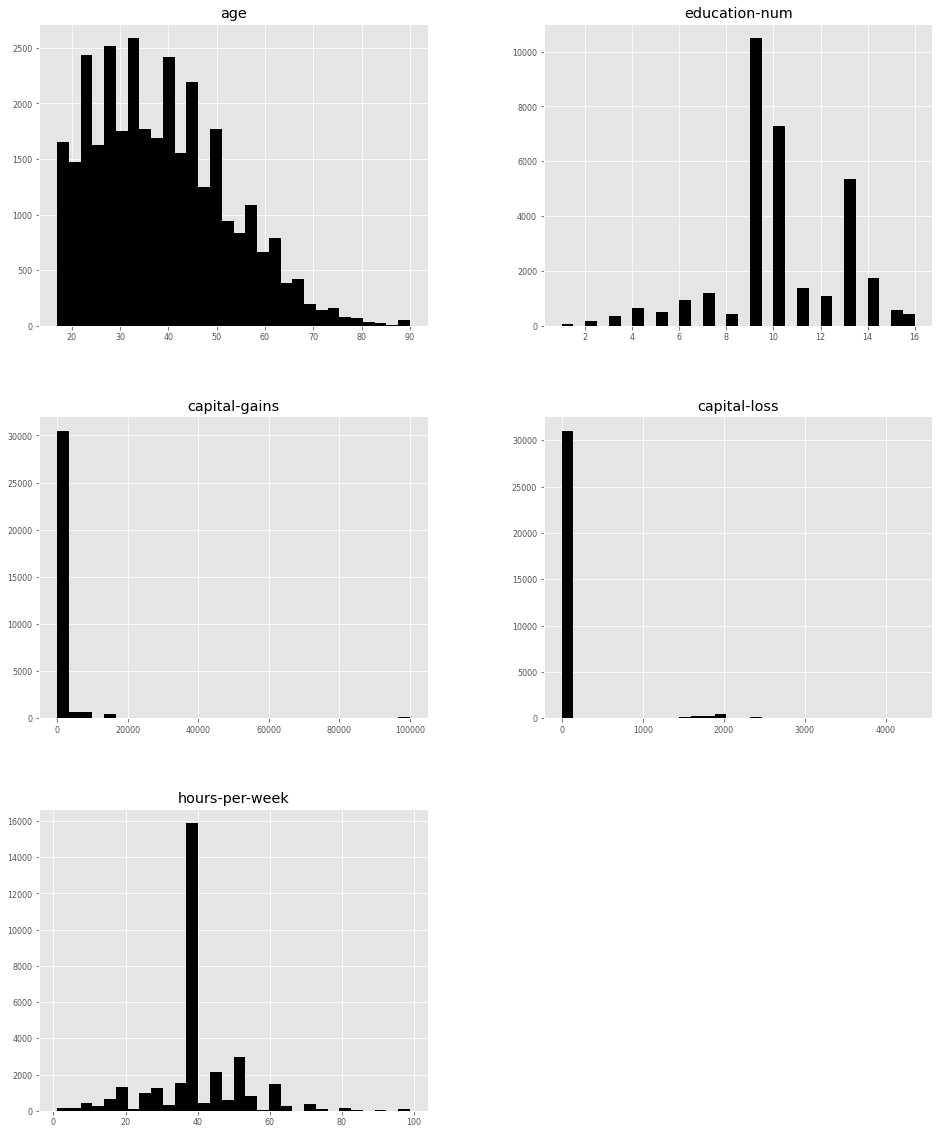

In [12]:
data[num_features].hist(
    figsize=(16, 20), 
    color = 'k', 
    bins=30, 
    xlabelsize=8, 
    ylabelsize=8
)

In [13]:
def check_outliers(df, feature):
  Q1 = df[feature].quantile(.25)
  Q3 = df[feature].quantile(.75)
  L_outliers= Q1 - 1.5 * (Q3-Q1)
  U_outliers= Q3 + 1.5 * (Q3-Q1)
  print(f'Lower outlier limit in {feature}: {L_outliers}')
  print(f'Upper outlier limit in {feature}: {U_outliers}')
  print()


In [14]:
for feature in data[num_features].columns:
  check_outliers(data, feature)

Lower outlier limit in age: -2.0
Upper outlier limit in age: 78.0

Lower outlier limit in education-num: 4.5
Upper outlier limit in education-num: 16.5

Lower outlier limit in capital-gains: 0.0
Upper outlier limit in capital-gains: 0.0

Lower outlier limit in capital-loss: 0.0
Upper outlier limit in capital-loss: 0.0

Lower outlier limit in hours-per-week: 32.5
Upper outlier limit in hours-per-week: 52.5



In [15]:
df_num = data[num_features]
outliers = {}
for i in range(df_num.shape[1]):
    min_t = df_num[df_num.columns[i]].mean() - (3 * df_num[df_num.columns[i]].std())
    max_t = df_num[df_num.columns[i]].mean() + (3 * df_num[df_num.columns[i]].std())
    count = 0
    for j in df_num[df_num.columns[i]]:
        if j < min_t or j > max_t:
            count += 1
    outliers[df_num.columns[i]] = [count,df_num.shape[0]-count]

In [16]:
for k, v in outliers.items():
  print(k, ': ', v)

age :  [121, 32440]
education-num :  [219, 32342]
capital-gains :  [215, 32346]
capital-loss :  [1470, 31091]
hours-per-week :  [440, 32121]


In [17]:
min_t = df_num[df_num.columns[i]].mean() - (3 * df_num[df_num.columns[i]].std())
max_t = df_num[df_num.columns[i]].mean() + (3 * df_num[df_num.columns[i]].std())

In [18]:
df_num['capital-gains'][df_num['capital-loss'] > max_t]

23       0
32       0
52       0
93       0
96       0
        ..
32441    0
32443    0
32445    0
32458    0
32500    0
Name: capital-gains, Length: 1519, dtype: int64

In [19]:
((df_num['capital-gains'] > max_t) | (df_num['capital-gains'] < min_t)).count()

32561

In [20]:
data[cat_features].head()

,workclass,marital-status,occupation,native-country
0,State-gov,Never-married,Adm-clerical,United-States
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,United-States
2,Private,Divorced,Handlers-cleaners,United-States
3,Private,Married-civ-spouse,Handlers-cleaners,United-States
4,Private,Married-civ-spouse,Prof-specialty,Cuba


In [21]:
for cat in cat_features:
  print(data[cat].value_counts(dropna=False, normalize=True))
  print()

 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
NaN                  0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215
Name: workclass, dtype: float64

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: marital-status, dtype: float64

 Prof-specialty       0.127146
 Craft-repair         0.125887
 Exec-managerial      0.124873
 Adm-clerical         0.115783
 Sales                0.112097
 Other-service        0.101195
 Machine-op-inspct    0.061485
NaN                   0.056601
 Transport-moving     0.049046
 Handlers-cleaners    0.042075
 Farming-fishing      0.030527
 Tech-support         0.028500
 Protective-serv      0.019932
 Priv-house

In [22]:
for cat in cat_features:
  print(f'{cat} : {data[cat].nunique()}')

workclass : 8
marital-status : 7
occupation : 14
native-country : 41


In [23]:
!pip install category_encoders --quiet

     |████████████████████████████████| 86 kB 2.6 MB/s 


In [24]:
# create instance of binary encoding
import category_encoders as ce


ce_binary = ce.BinaryEncoder(data[cat_features])

In [25]:
# fit and transform to get encoded cat
bin = ce_binary.fit_transform(data[cat_features])
bin.head()

,workclass_0,workclass_1,workclass_2,workclass_3,marital-status_0,marital-status_1,marital-status_2,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
2,0,0,1,1,0,1,1,0,0,1,1,0,0,0,0,0,1
3,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1
4,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0


In [26]:
bin.shape

(32561, 17)

In [27]:
data = pd.concat([data.drop(columns=cat_features), bin], axis=1)
data.head()

,age,education-num,capital-gains,capital-loss,hours-per-week,workclass_0,workclass_1,workclass_2,workclass_3,marital-status_0,...,occupation_0,occupation_1,occupation_2,occupation_3,native-country_0,native-country_1,native-country_2,native-country_3,native-country_4,native-country_5
0,39,13,2174,0,40,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,50,13,0,0,13,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,38,9,0,0,40,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
3,53,7,0,0,40,0,0,1,1,0,...,0,0,1,1,0,0,0,0,0,1
4,28,13,0,0,40,0,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0


In [28]:
data.shape

(32561, 22)

In [29]:
data.isna().sum()

age                 0
education-num       0
capital-gains       0
capital-loss        0
hours-per-week      0
workclass_0         0
workclass_1         0
workclass_2         0
workclass_3         0
marital-status_0    0
marital-status_1    0
marital-status_2    0
occupation_0        0
occupation_1        0
occupation_2        0
occupation_3        0
native-country_0    0
native-country_1    0
native-country_2    0
native-country_3    0
native-country_4    0
native-country_5    0
dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(
    data, target,
    test_size=0.10,
    random_state=42,
    stratify=target,
)

X_train, X_dev, y_train, y_dev = train_test_split(
    X, y,
    test_size=X_test.shape[0]/X.shape[0],
    random_state=42,
)

(
    X_train.shape, y_train.shape, 
    X_dev.shape, y_dev.shape, 
    X_test.shape, y_test.shape
)

((26047, 22), (26047,), (3257, 22), (3257,), (3257, 22), (3257,))

In [31]:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

In [32]:
pred_1 = model_NB.predict([[39,13,2174,0,40,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0	]])
print(pred_1)

[' <=50K']


In [33]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
pred_2 = model_DT.predict([[39,13,2174,0,40,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0	]])
print(pred_2)

[' <=50K']
